# MNIST Handwritten Digit Recognition

The MNIST Handwritten Digit Recognition problem consists of 8x8 pictures and labels from 0-9 describing the number
that is depicted on a picture.

To get started we first have to load the dataset from sklearn.

In [1]:
from sklearn.datasets import load_digits

In "regular" machine learning a conditional distribution P(Q|E) is approximated.
However, as the name JPT suggests, we are interested in the joint distribution P(Q,E).
Therefore, we have to load all the data (images and labels) in one dataframe.

In [2]:
dataset = load_digits(as_frame=True)
df = dataset.data
df["digit"] = dataset.target

Next we have to create variables that can be used in the JPT package.
Firstly we have to import the necessary functionality. We will infer the variables from the dataframe without standardizing the numeric ones.

In [3]:
from jpt.variables import infer_from_dataframe
variables = infer_from_dataframe(df, scale_numeric_types=False)
variables

[pixel_0_0[Numeric(NUM)],
 pixel_0_1[Numeric(NUM)],
 pixel_0_2[Numeric(NUM)],
 pixel_0_3[Numeric(NUM)],
 pixel_0_4[Numeric(NUM)],
 pixel_0_5[Numeric(NUM)],
 pixel_0_6[Numeric(NUM)],
 pixel_0_7[Numeric(NUM)],
 pixel_1_0[Numeric(NUM)],
 pixel_1_1[Numeric(NUM)],
 pixel_1_2[Numeric(NUM)],
 pixel_1_3[Numeric(NUM)],
 pixel_1_4[Numeric(NUM)],
 pixel_1_5[Numeric(NUM)],
 pixel_1_6[Numeric(NUM)],
 pixel_1_7[Numeric(NUM)],
 pixel_2_0[Numeric(NUM)],
 pixel_2_1[Numeric(NUM)],
 pixel_2_2[Numeric(NUM)],
 pixel_2_3[Numeric(NUM)],
 pixel_2_4[Numeric(NUM)],
 pixel_2_5[Numeric(NUM)],
 pixel_2_6[Numeric(NUM)],
 pixel_2_7[Numeric(NUM)],
 pixel_3_0[Numeric(NUM)],
 pixel_3_1[Numeric(NUM)],
 pixel_3_2[Numeric(NUM)],
 pixel_3_3[Numeric(NUM)],
 pixel_3_4[Numeric(NUM)],
 pixel_3_5[Numeric(NUM)],
 pixel_3_6[Numeric(NUM)],
 pixel_3_7[Numeric(NUM)],
 pixel_4_0[Numeric(NUM)],
 pixel_4_1[Numeric(NUM)],
 pixel_4_2[Numeric(NUM)],
 pixel_4_3[Numeric(NUM)],
 pixel_4_4[Numeric(NUM)],
 pixel_4_5[Numeric(NUM)],
 pixel_4_6[N

The "digit" variable gets recognized as a numeric variable, which is technically the truth. However, the numeric
representation of it is not useful for the representation problem. Therefore, we have to change it to a symbolic
variable. To create a variable we need a type and a name.

In [4]:
from jpt.variables import SymbolicVariable, SymbolicType

digit_type = SymbolicType("digit", [i for i in range(10)])
digit = SymbolicVariable("digit", digit_type)
variables[-1] = digit
variables[-1]

digit[digit(SYM)]

Next we have to create the model. We want the model to only acquire new parameters if they are relevant to 30 samples or more.

In [5]:
import jpt.trees
model = jpt.trees.JPT(variables, min_samples_leaf=20)
model

JPT
None

JPT stats: #innernodes = 0, #leaves = 0 (0 total)

To finish the knowledge acquisition part we have to fit the model. This is done sklearn style.

In [6]:
model.fit(df)

JPT
<DecisionNode #0 pixel_5_3 = []-∞,2.5[; [2.5,∞[]; parent-#: None; #children: 2>
    <DecisionNode #1 pixel_3_4 = []-∞,2.5[; [2.5,∞[]; parent-#: 0; #children: 2>
        <DecisionNode #3 digit = [0; ¬0]; parent-#: 1; #children: 2>
            <DecisionNode #7 pixel_6_6 = []-∞,1.5[; [1.5,∞[]; parent-#: 3; #children: 2>
                <DecisionNode #15 pixel_0_5 = []-∞,4.5[; [4.5,∞[]; parent-#: 7; #children: 2>
                    <DecisionNode #29 pixel_2_3 = []-∞,4.5[; [4.5,∞[]; parent-#: 15; #children: 2>
                        <Leaf #53; parent: <DecisionNode #29>>
                        <Leaf #54; parent: <DecisionNode #29>>
                    <Leaf #30; parent: <DecisionNode #15>>
                <DecisionNode #16 pixel_1_4 = []-∞,13.5[; [13.5,∞[]; parent-#: 7; #children: 2>
                    <DecisionNode #31 pixel_0_2 = []-∞,2.5[; [2.5,∞[]; parent-#: 16; #children: 2>
                        <Leaf #55; parent: <DecisionNode #31>>
                        <Leaf #56; parent

The easiest way to understand a JPT is through plotting. JPTs get plotted with matplotlib and svgs. Due to their possible enormous size it is advised to open the result svg file with inkscape.

In [7]:
model.plot(directory="/tmp/mnist")

Next we want to see what a 3 most likely looks like. Therefore, we have to use the MPE inference method. In general inference is done through variable maps.

In [8]:
import jpt.variables
evidence = jpt.variables.VariableMap()
evidence[model.varnames["digit"]] = {3}

mpe = model.mpe(evidence)
mpe

odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


The jpt.trees.JPT.mpe method returns a list of explanations that are all most likely. The list contains jpt.trees.JPT.MPEResult. We will have a look at every maximum. Since we only have one explanation that is
most likely we only need to look inside the maxima in that explanation. The maximum property of an MPEResult is a VariableMap that maps symbolic variables to sets and numeric variables to RealSets. This is based on the fact that there can be multiple maxima inside one leaf and therefore the user should be aware of it. Unlike distributions from the exponential families JPTs also return intervals where every value is most likely. Let's investigate and plot the result.

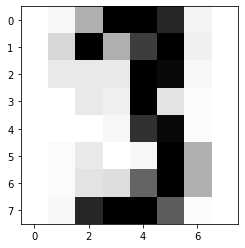

In [10]:
first_mpe = mpe[0]

import numpy as np
# create image
img = np.zeros((8,8))

for variable, explanation in first_mpe.maximum.items():

    # filter out numeric variables
    if variable.numeric:

        # get position in image
        i, j = int(variable.name[6]), int(variable.name[8])

        # get first interval in maximum
        interval = explanation.intervals[0]

        # set pixel value to center of that interval
        img[i,j] = (interval.lower + interval.upper) / 2

import matplotlib.pyplot as plt
plt.imshow(img, cmap='Greys')
plt.show()

As we can see it indeed looks like a 3.